In [401]:
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('seaborn-darkgrid')
from numpy import sin, cos
from numpy.random import multivariate_normal as noise
from numpy import pi as PI

deltaT = 0.01 # seconds
sim_time = 1 # seconds
T = np.arange(0, sim_time, deltaT)
Nsteps = len(T)

class System :
    def __init__(self, F, H, Q, R, x0):
        self.F = F
        self.H = H
        self.Q = Q
        self.R = R
        self.x = x0
        self.n = F.shape[0]
        self.p = H.shape[0]

    def update_state(self):
        self.x = self.F @ self.x + noise(np.zeros(self.n), self.Q)

    def measure(self):
        return self.H @ self.x + noise(np.zeros(self.p), self.R)
      
class Kalman : 
    def __init__ (self, F, H, Q, R, x0 , P_init):
        self.F = F
        self.H = H
        self.Q = Q
        self.R = R
        self.x_hat = x0
        self.Pbar = None
        self.P = P_init

    def predict(self):
        self.x_hat = self.F @ self.x_hat 
        self.Pbar = self.F @ self.P @ self.F.T + self.Q
    
    def update(self, z):
        K = self.Pbar @ self.H.T @ np.linalg.inv(self.H @ self.Pbar @ self.H.T + self.R)
        self.x_hat = self.x_hat + K @ (z - self.H @ self.x_hat)
        self.P = self.Pbar - K @ self.H @ self.Pbar

In [402]:
X = np.empty((Nsteps,2))
X_hat = np.empty((Nsteps,2))
Xpredict = np.empty(Nsteps)
Z = np.empty(Nsteps)
F = np.array([[1, deltaT], [0, 1]])
H = np.array([[1 , 0]])
Q = np.array([[20, 0], [0, 20]])
R = np.array([[10]])
x0_real = np.array([5, 0])
# Fhat = np.array([[0.8, deltaT*0.8], [0, 0.7]])
# Hhat = np.array([[1 , 0]])
Qhat = np.diag([5, 5])
Rhat = np.array([[5]])
# x0 = np.array([-3, 500])
Fhat = F
Hhat = H
# Qhat = Q
# Rhat = R
Po = np.diag([20,20])
x0 = np.array([-10, 0])
cart = System(F, H, Q, R, x0_real)
kalman = Kalman(Fhat, Hhat, Qhat, Rhat, x0, Po)
for i in range(Nsteps):
    cart.update_state()
    kalman.predict()
    Xpredict[i] = kalman.x_hat[0]
    z = cart.measure()
    Z[i] = z
    kalman.update(z)
    X[i] = cart.x
    X_hat[i] = kalman.x_hat
print(np.average((Z - X[:,0])**2))
print(np.average((X_hat[:,0] - X[:,0])**2))
print(np.average(np.abs(Z - X[:,0])))
print(np.average(np.abs(X_hat[:,0] - X[:,0])))

9.180645315785725
7.941769431121858
2.583897742430497
2.2292952885196127


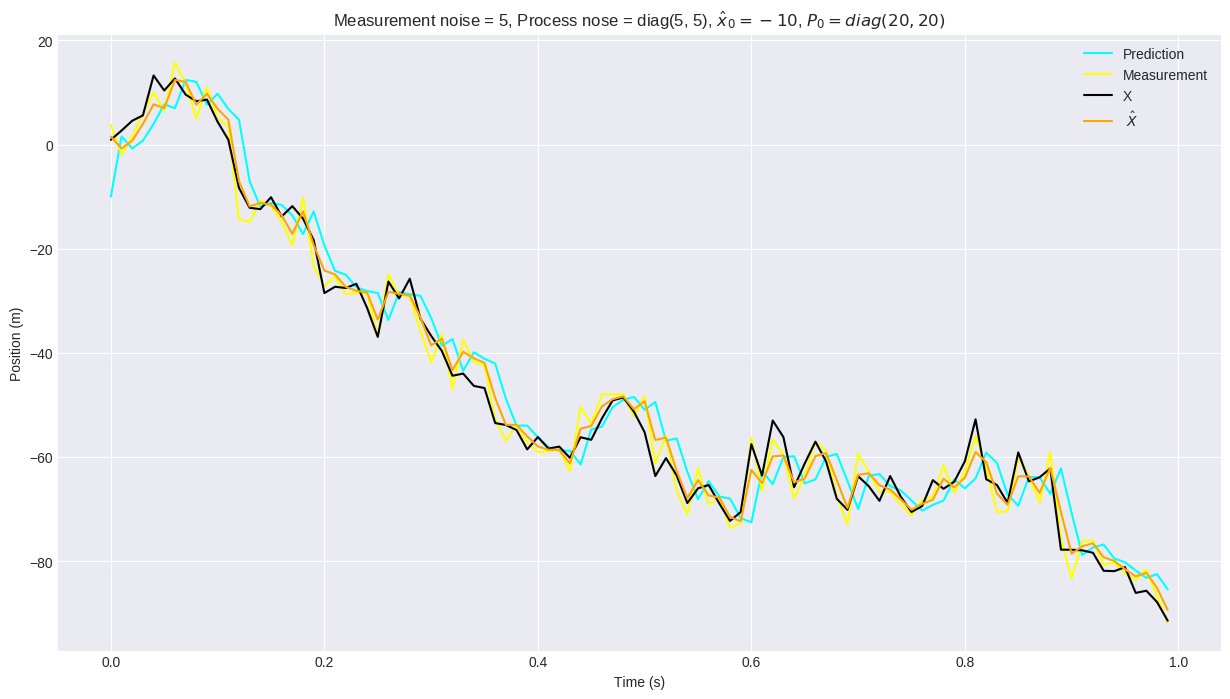

In [403]:
fromt = 0
plt.figure(figsize=(15,8))
plt.plot(T[fromt:], Xpredict[fromt:], label='Prediction', color='cyan')
plt.plot(T[fromt:], Z[fromt:], label = 'Measurement', color='yellow')
plt.plot(T[fromt:], X[fromt:,0], label = 'X', color='black')
plt.plot(T[fromt:], X_hat[fromt:,0], label = ' $\hat{X}$', color='orange')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title(f'Measurement noise = {Rhat[0,0]}, Process nose = diag({Qhat[0,0]}, {Qhat[1,1]}), $\hatx_0 = {x0[0]}$, $P_0 = diag({Po[0,0]}, {Po[1,1]})$')
plt.show()

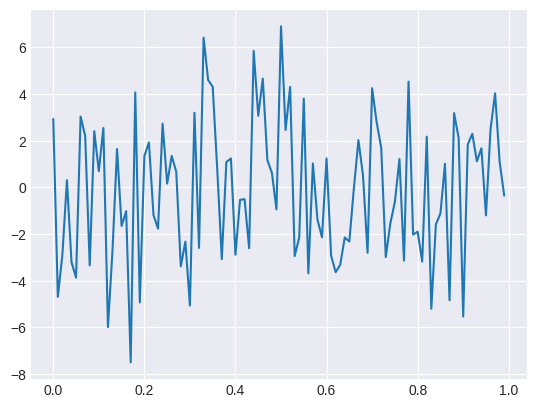

In [404]:
plt.plot(T, Z - X[:,0])

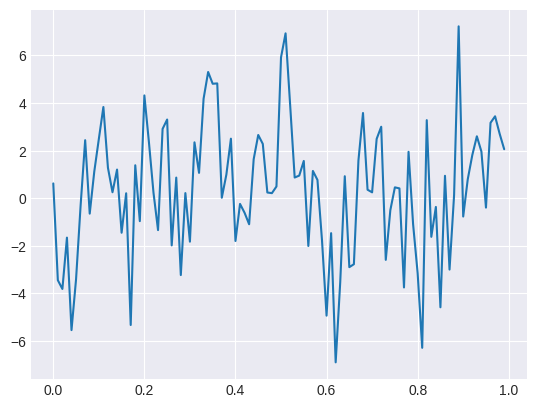

In [405]:
plt.plot(T, X_hat[:,0] - X[:,0])